In [1]:
from keras.models import Sequential
from keras import layers

from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


Using TensorFlow backend.
C:\Users\gudiy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\gudiy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\gudiy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\gudiy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
df = pd.read_csv('imdb_master.csv',encoding='latin-1')
print(df.head())
sentences = df['review'].values
pureSentences = sentences
y = df['label'].values


   Unnamed: 0  type                                             review label  \
0           0  test  Once again Mr. Costner has dragged out a movie...   neg   
1           1  test  This is an example of why the majority of acti...   neg   
2           2  test  First of all I hate those moronic rappers, who...   neg   
3           3  test  Not even the Beatles could write songs everyon...   neg   
4           4  test  Brass pictures (movies is not a fitting word f...   neg   

          file  
0      0_2.txt  
1  10000_4.txt  
2  10001_1.txt  
3  10002_3.txt  
4  10003_3.txt  


In [3]:
#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

In [4]:
#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

In [5]:
import numpy as np
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
input_dim=np.prod(X_train.shape[1:])
# Number of features
print(input_dim)

2000


In [6]:
model = Sequential()
model.add(layers.Dense(300, activation='relu',input_dim=input_dim))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)


Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 10s 139us/step - loss: 0.8783 - acc: 0.5046 - val_loss: 0.8434 - val_acc: 0.5138
Epoch 2/5
75000/75000 [==============================] - 10s 129us/step - loss: 0.7895 - acc: 0.5782 - val_loss: 0.8459 - val_acc: 0.5140
Epoch 3/5
75000/75000 [==============================] - 10s 128us/step - loss: 0.6863 - acc: 0.6789 - val_loss: 0.8746 - val_acc: 0.5094
Epoch 4/5
75000/75000 [==============================] - 10s 128us/step - loss: 0.4992 - acc: 0.8127 - val_loss: 0.9602 - val_acc: 0.5118
Epoch 5/5
75000/75000 [==============================] - 10s 127us/step - loss: 0.2912 - acc: 0.9237 - val_loss: 1.0666 - val_acc: 0.5044


In [7]:
from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in pureSentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(pureSentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
print(vocab_size)
print(max_review_len)

176408
2470


In [8]:
from keras.layers import Embedding, Flatten
m = Sequential()
m.add(Embedding(vocab_size, 50, input_length=max_review_len))
m.add(Flatten())
m.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
m.add(layers.Dense(3, activation='softmax'))
m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [9]:
history1=m.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 403s 5ms/step - loss: 1.0203 - acc: 0.4940 - val_loss: 0.8616 - val_acc: 0.5024
Epoch 2/5
75000/75000 [==============================] - 329s 4ms/step - loss: 0.8371 - acc: 0.5169 - val_loss: 0.8503 - val_acc: 0.5000
Epoch 3/5
75000/75000 [==============================] - 294s 4ms/step - loss: 0.7908 - acc: 0.5534 - val_loss: 0.8465 - val_acc: 0.4994
Epoch 4/5
75000/75000 [==============================] - 288s 4ms/step - loss: 0.7179 - acc: 0.6225 - val_loss: 0.8882 - val_acc: 0.4945
Epoch 5/5
75000/75000 [==============================] - 350s 5ms/step - loss: 0.6056 - acc: 0.7024 - val_loss: 0.9801 - val_acc: 0.4874


In [11]:
from sklearn.datasets import fetch_20newsgroups
from keras.preprocessing.text import Tokenizer
import numpy as np
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
sentences= twenty_train.data
y=twenty_train.target

tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
# sentences = tokenizer.texts_to_matrix(sentences)

from keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

from keras.layers import Embedding, Flatten
n = Sequential()
n.add(Embedding(vocab_size, 50, input_length=max_review_len))
n.add(Flatten())
n.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
n.add(layers.Dense(20, activation='softmax'))
n.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

h2=n.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 8485 samples, validate on 2829 samples
Epoch 1/5
8485/8485 [==============================] - 216s 25ms/step - loss: 8.5963 - acc: 0.0539 - val_loss: 3.1011 - val_acc: 0.0509
Epoch 2/5
8485/8485 [==============================] - 168s 20ms/step - loss: 2.9867 - acc: 0.0674 - val_loss: 2.9793 - val_acc: 0.0569
Epoch 3/5
8485/8485 [==============================] - 142s 17ms/step - loss: 2.9507 - acc: 0.0698 - val_loss: 3.0181 - val_acc: 0.0795
Epoch 4/5
8485/8485 [==============================] - 148s 17ms/step - loss: 2.9294 - acc: 0.0824 - val_loss: 2.9326 - val_acc: 0.0732
Epoch 5/5
8485/8485 [==============================] - 139s 16ms/step - loss: 2.8695 - acc: 0.0882 - val_loss: 2.8799 - val_acc: 0.0916
Actual Prediction 6 Predicted Prediction [4]


In [30]:
x=n.predict_classes(X_test[[4],:])
print("Actual Prediction",y_test[4],"Predicted Prediction",x)

Actual Prediction 4 Predicted Prediction [4]


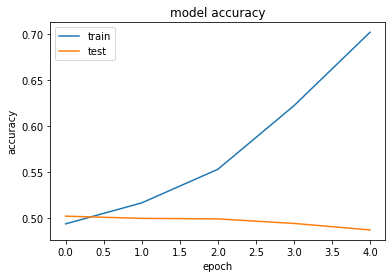

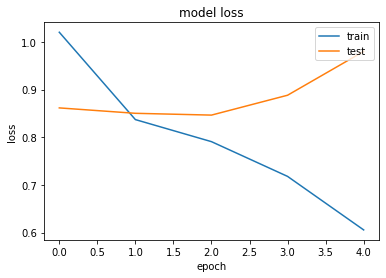

In [21]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()